# Wine Quality Validation

## Business Understanding
A novice winemaker, Gino, is investigating what chemical properties could determine the quality of a wine.

## Analytic Approach
Now that our business problem has been realized, our analytical approach will begin.
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

Statistical correlation and scatter plots will both be very helpful for this problem.

## Data Collection

In [1]:
# To begin, we will import required libraries
# In an individual Jupyter Notebook, once libraries are imported they can be used through the entire notebook
import pandas as pd
from matplotlib import pyplot as plt

# In this segment, we will load a dataset from a url.
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";", dtype={'quality':float})

#This line of code will provide a preview of the first three rows of data that was loaded
wine_data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0


## Data Understanding

In [2]:
# This will give us descriptive statistics (such as count, mean, min/max, 
# standard deviation) for each column in out dataset
descriptive_stats = wine_data.describe()

# Just having a variable name on a the last line of a cell outputs the value of
# that variable
descriptive_stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
# Here, we will identify if any of these columns have missing values.
# Missing values can inhibit some machine learning modeling capabilities
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Preparation

In [4]:
#Rename columns to improve appearance
wine_prop = wine_data
wine_prop.columns = ['Fixed Acidity','Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density','pH','Sulphates','Alcohol', 'Quality']
wine_prop.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [5]:
#Observe wine types
wine_prop.dtypes

Fixed Acidity           float64
Volatile Acidity        float64
Citric Acid             float64
Residual Sugar          float64
Chlorides               float64
Free Sulfur Dioxide     float64
Total Sulfur Dioxide    float64
Density                 float64
pH                      float64
Sulphates               float64
Alcohol                 float64
Quality                 float64
dtype: object

## Modeling

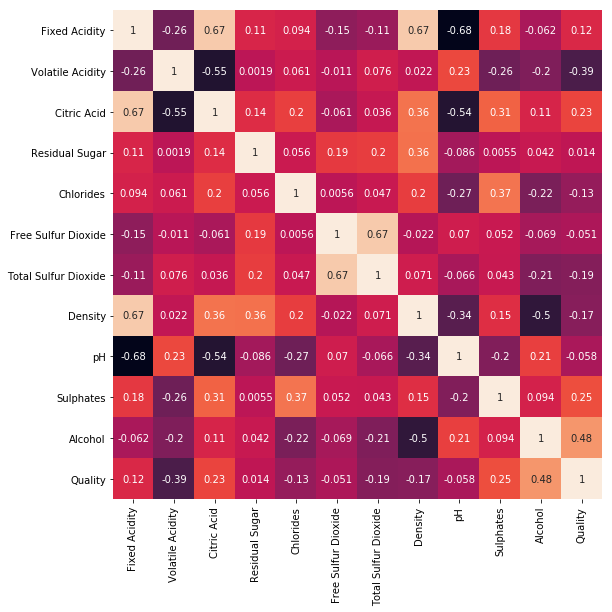

In [6]:
#Import seaborn to do a statistical correlation heatmap 
import seaborn as sns
corrmat = wine_prop.corr()
f, ax = plt.subplots(figsize=(9, 9))
f = sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cbar=False)

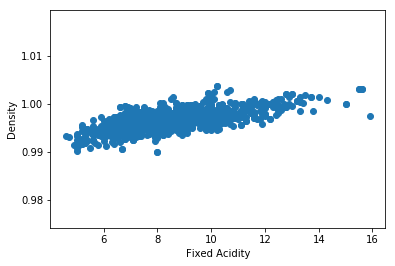

In [7]:
#We now see that Fixed Acidity and Citric acid are related to eachother
plt.scatter(wine_prop['Fixed Acidity'], wine_prop['Density'])
plt.xlabel('Fixed Acidity')
plt.ylabel('Density')
plt.show()

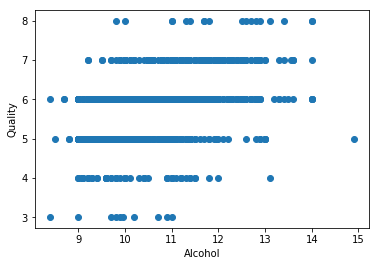

In [8]:
plt.scatter(wine_prop['Alcohol'], wine_prop['Quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

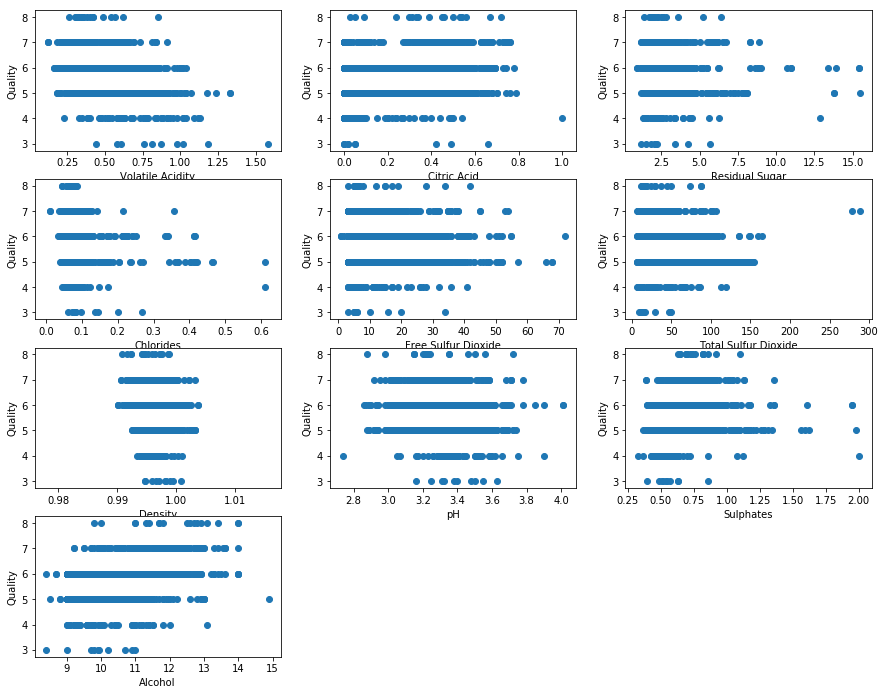

In [9]:
#Produce plots of all column values against "Quality, our target"
wine_target_name = "Quality"
wine_target = wine_prop[wine_target_name]
fig = plt.figure(figsize=(15, 15))

# The enumerate function will give us the index as well as the value
for (i, column) in enumerate(list(wine_prop.columns)):
  if(column == wine_target_name) or (column == "Fixed Acidity"):
    continue
  plt.subplot(5,3,i)
  plt.scatter(wine_prop[column], wine_prop[wine_target_name])
  plt.xlabel(column)
  plt.ylabel(wine_target_name)
  
plt.show()

## Evaluation
### Regression Model with Keras
Keras is an easy-to-use API for building deep learning models

In [10]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

wine_prop_columns = wine_prop.columns

predictors = wine_prop[wine_prop_columns[wine_prop_columns != 'Quality']] # all columns except Quality
target = wine_prop['Quality'] # Strength column

Using TensorFlow backend.


In [11]:
predictors.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [12]:
target.head()

0    5.0
1    5.0
2    5.0
3    6.0
4    5.0
Name: Quality, dtype: float64

In [13]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946


In [14]:
n_cols = predictors_norm.shape[1] # number of predictors

In [15]:
def regression_model():
   
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    #We need to compile our model and use adam optimizer and MSE
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [16]:
model = regression_model()

In [17]:
data=[]
reportData = pd.DataFrame(data)
for j in range(0, 2, 1):
    model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=2)
    predicted_strength = model.predict(predictors_norm)
    i = mean_squared_error(predicted_strength, target, sample_weight=None)
    data.append(i)

Train on 1119 samples, validate on 480 samples
Epoch 1/100
 - 1s - loss: 30.4845 - val_loss: 27.6849
Epoch 2/100
 - 0s - loss: 23.8564 - val_loss: 20.9764
Epoch 3/100
 - 0s - loss: 15.4846 - val_loss: 12.9371
Epoch 4/100
 - 0s - loss: 8.5988 - val_loss: 6.5360
Epoch 5/100
 - 0s - loss: 4.9836 - val_loss: 3.3110
Epoch 6/100
 - 0s - loss: 3.0226 - val_loss: 2.2504
Epoch 7/100
 - 0s - loss: 2.2265 - val_loss: 2.0725
Epoch 8/100
 - 0s - loss: 1.9318 - val_loss: 2.0099
Epoch 9/100
 - 0s - loss: 1.7465 - val_loss: 1.9407
Epoch 10/100
 - 0s - loss: 1.6272 - val_loss: 1.8724
Epoch 11/100
 - 0s - loss: 1.5196 - val_loss: 1.8088
Epoch 12/100
 - 0s - loss: 1.4365 - val_loss: 1.7507
Epoch 13/100
 - 0s - loss: 1.3678 - val_loss: 1.6913
Epoch 14/100
 - 0s - loss: 1.3043 - val_loss: 1.6238
Epoch 15/100
 - 0s - loss: 1.2541 - val_loss: 1.5728
Epoch 16/100
 - 0s - loss: 1.2001 - val_loss: 1.5199
Epoch 17/100
 - 0s - loss: 1.1538 - val_loss: 1.4589
Epoch 18/100
 - 0s - loss: 1.1077 - val_loss: 1.4162
Ep

 - 0s - loss: 0.3234 - val_loss: 0.4654
Epoch 55/100
 - 0s - loss: 0.3237 - val_loss: 0.4647
Epoch 56/100
 - 0s - loss: 0.3245 - val_loss: 0.4701
Epoch 57/100
 - 0s - loss: 0.3197 - val_loss: 0.4529
Epoch 58/100
 - 0s - loss: 0.3216 - val_loss: 0.4662
Epoch 59/100
 - 0s - loss: 0.3224 - val_loss: 0.4731
Epoch 60/100
 - 0s - loss: 0.3212 - val_loss: 0.4683
Epoch 61/100
 - 0s - loss: 0.3223 - val_loss: 0.4662
Epoch 62/100
 - 0s - loss: 0.3182 - val_loss: 0.4602
Epoch 63/100
 - 0s - loss: 0.3223 - val_loss: 0.4899
Epoch 64/100
 - 0s - loss: 0.3191 - val_loss: 0.4624
Epoch 65/100
 - 0s - loss: 0.3193 - val_loss: 0.4628
Epoch 66/100
 - 0s - loss: 0.3203 - val_loss: 0.4619
Epoch 67/100
 - 0s - loss: 0.3188 - val_loss: 0.4708
Epoch 68/100
 - 0s - loss: 0.3160 - val_loss: 0.4618
Epoch 69/100
 - 0s - loss: 0.3177 - val_loss: 0.4644
Epoch 70/100
 - 0s - loss: 0.3204 - val_loss: 0.4720
Epoch 71/100
 - 0s - loss: 0.3163 - val_loss: 0.4660
Epoch 72/100
 - 0s - loss: 0.3173 - val_loss: 0.4822
Epoch 

In [18]:
reportData['Test'] = data

In [19]:
reportData

,Test
0,0.393221
1,0.355059


## Deployment
As this is for a small investigatve purpose, commerical deployment is not necessary 

## Feedback
This final stage of the process is often overlooked but can yield substantial benefits if properly leveraged. 

Now that Gino have obtainined results from our modeling, he can begin experimentation with Alcohol, Acidity, and Sulfates to see if this affects Quality

Gino would also seek out lots of datasets to increase volume of total data, add additional metadata fields, and remove chance for error. 

### References
* https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/
* https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
* https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names